# WOS v1 데이터 EDA

In [1]:
import json
from collections import defaultdict
import matplotlib.pyplot as plt

In [2]:
train_path = '../assets/data/trip/wos-v1/wos-v1_train.json'
test_path = '../assets/data/trip/wos-v1/wos-v1_dev.json'

with open(f'{train_path}', 'r', encoding='utf8') as fr:
    train_dial_data = json.load(fr)

with open(f'{test_path}', 'r', encoding='utf8') as fr:
    test_dial_data = json.load(fr)

## 데이터셋 전체 설명

- 언어: 한국어
- Meta Domain: 여행
- 단일 Domain 종류: 5
- Slot: 45 (모든 Slot은 Informable Slot)

※ 참고 사항
- Informable Slot: 특정 Knowledge Base의 instance를 찾거나, 새로운 instance를 write하기 위해 User가 System에게 주거나 맥락에 의해 User가 의도할 수 있는 타입의 정보 (대화에 대한 제약 사항 및 DST의 target)
- Requestable Slot: 특정 Knowledge Base의 instance가 선택된 이후, 추가로 정보를 요청할 수 있는 타입의 정보 (System이 User에게 제공)

## Domain 분석

데이터 내 Dialogue의 도메인 종류에 따른 데이터 분석

In [3]:
domains_counter = defaultdict(int)
domain_combs_counter = defaultdict(int)

train_domains_counter = defaultdict(int)
train_domain_combs_counter = defaultdict(int)

test_domains_counter = defaultdict(int)
test_domain_combs_counter = defaultdict(int)


for dialogue in train_dial_data:
    domains = sorted(dialogue["domains"])

    for domain in domains:
        domains_counter[domain] += 1
        train_domains_counter[domain] += 1
    
    domain_comb = ", ".join(domains)
    domain_combs_counter[domain_comb] += 1
    train_domain_combs_counter[domain_comb] += 1

for dialogue in test_dial_data:
    domains = sorted(dialogue["domains"])

    for domain in domains:
        domains_counter[domain] += 1
        test_domains_counter[domain] += 1

    domain_comb = ", ".join(domains)
    domain_combs_counter[domain_comb] += 1
    test_domain_combs_counter[domain_comb] += 1

### 개별 도메인

In [4]:
print('----- 전체')
print(domains_counter, sep=": \n")
print('----- 학습 데이터')
print(train_domains_counter, sep=": \n")
print('----- 테스트 데이터')
print(test_domains_counter, sep=": \n")

----- 전체
defaultdict(<class 'int'>, {'관광': 4873, '식당': 5327, '지하철': 941, '택시': 2942, '숙소': 5063})
----- 학습 데이터
defaultdict(<class 'int'>, {'관광': 4318, '식당': 4688, '지하철': 764, '택시': 2708, '숙소': 4396})
----- 테스트 데이터
defaultdict(<class 'int'>, {'관광': 555, '숙소': 667, '식당': 639, '택시': 234, '지하철': 177})


### 학습 데이터 도메인 조합

In [5]:
for key in train_domain_combs_counter:
    print(f"{key:15}\t: {train_domain_combs_counter[key]}")

관광, 식당         	: 639
관광             	: 458
관광, 식당, 지하철    	: 283
택시             	: 344
식당, 택시         	: 481
숙소, 택시         	: 443
식당             	: 524
숙소, 식당         	: 895
관광, 숙소         	: 526
관광, 숙소, 식당     	: 1010
숙소             	: 476
관광, 택시         	: 373
숙소, 식당, 택시     	: 308
관광, 숙소, 지하철    	: 184
관광, 식당, 택시     	: 370
관광, 숙소, 택시     	: 389
관광, 지하철        	: 86
숙소, 식당, 지하철    	: 136
식당, 지하철        	: 42
숙소, 지하철        	: 29
지하철            	: 4


### 테스트 데이터 도메인 조합

In [6]:
for key, value in test_domain_combs_counter.items():
    print(f"{key:15}\t: {value}")

관광, 숙소, 식당     	: 208
식당, 택시         	: 27
숙소             	: 92
관광, 식당, 지하철    	: 35
관광, 숙소         	: 36
관광, 숙소, 택시     	: 51
숙소, 식당, 택시     	: 72
관광, 숙소, 지하철    	: 58
관광, 식당, 택시     	: 42
관광, 지하철        	: 14
숙소, 식당         	: 64
식당             	: 92
숙소, 식당, 지하철    	: 63
관광, 식당         	: 29
관광             	: 74
숙소, 택시         	: 23
관광, 택시         	: 8
식당, 지하철, 택시    	: 6
식당, 지하철        	: 1
택시             	: 5


### 도메인 조합 그래프

In [7]:
plt.rc('font', family='NanumGothic')

domain_combs_counter = sorted(domain_combs_counter.items(), key=lambda k_v: k_v[1])
domain_combs_counter = {key:value for key, value in domain_combs_counter}

dom_topics = [key for key in domains_counter.keys()]
dom_train_value = [train_domains_counter[key] for key in dom_topics]
dom_test_value = [test_domains_counter[key] for key in dom_topics]

cdom_topics = [key for key in domain_combs_counter.keys()]
cdom_train_value = [train_domain_combs_counter[key] for key in cdom_topics]
cdom_test_value = [test_domain_combs_counter[key] for key in cdom_topics]

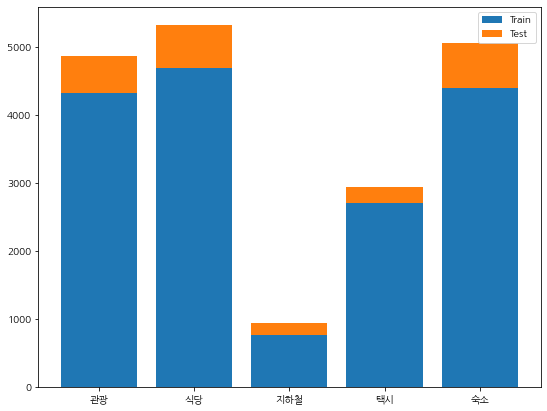

In [8]:
plt.rcParams["figure.figsize"] = (9, 7)
plt.bar(dom_topics, dom_train_value)
plt.bar(dom_topics, dom_test_value, bottom=dom_train_value)
plt.legend(['Train', 'Test'])
plt.show()

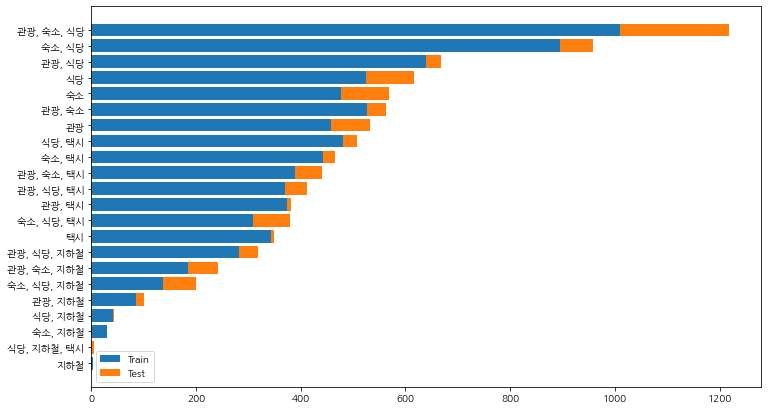

In [9]:
plt.rcParams["figure.figsize"] = (12, 7)
plt.barh(cdom_topics, cdom_train_value)
plt.barh(cdom_topics, cdom_test_value, left=cdom_train_value)
plt.legend(['Train', 'Test'])
plt.show()